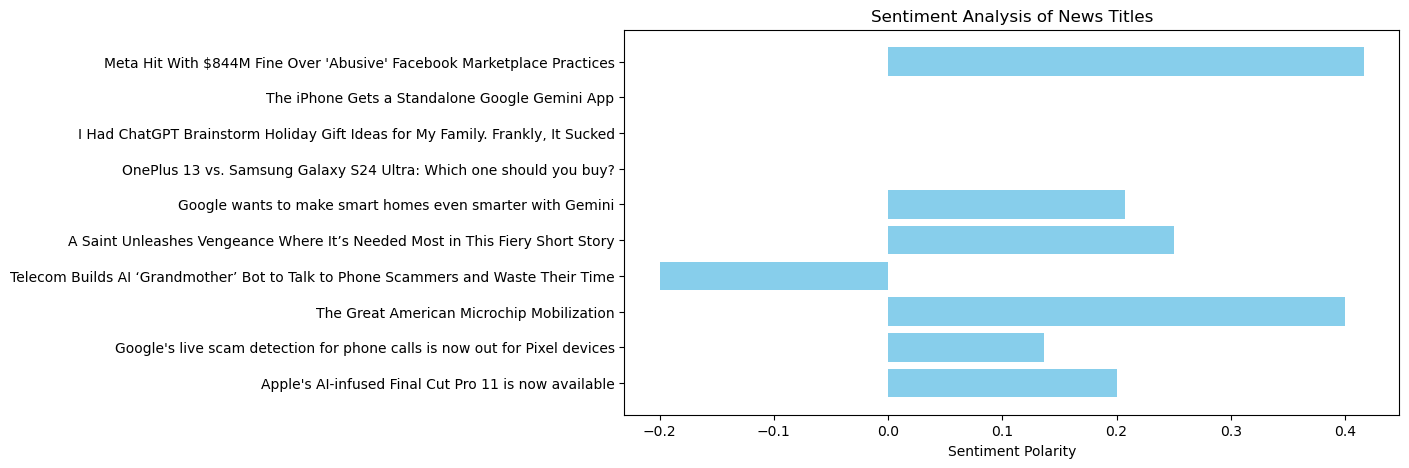

In [3]:
from newsapi import NewsApiClient
import requests
from env import api_key
from textblob import TextBlob
import matplotlib.pyplot as plt

# Define the URL for the News API request
url = f"https://newsapi.org/v2/everything?q=AI&sortBy=popularity&language=en&from=2024-11-14&to=2024-11-14&apiKey={api_key}"

# Make a GET request to the News API
response = requests.get(url)
# Parse the JSON response from the API
data = response.json()
# Extract the titles of all articles from the response
titles = [article['title'] for article in data['articles']]

# Limit the list to the first 10 titles
limited_titles = titles[:10]

# Function to perform sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Analyze sentiment for each title
sentiments = [analyze_sentiment(title) for title in limited_titles]

# Visualize the results
plt.figure(figsize=(10, 5)) # Set the figure size to 10 inches wide by 5 inches tall
plt.barh(limited_titles, sentiments, color='skyblue') # Create a horizontal bar plot with the titles on the y-axis and their sentiment scores on the x-axis
# The bars are colored 'skyblue'
plt.xlabel('Sentiment Polarity') # Label the x-axis to indicate it represents sentiment polarity
plt.title('Sentiment Analysis of News Titles') # Set the title of the plot
plt.show() # Display the plot

#Sentiment analysis with TextBlob assigns a polarity score to each piece of text. This score ranges from -1 to 1:
# -1 indicates a very negative sentiment.
# 0 indicates a neutral sentiment.
# 1 indicates a very positive sentiment.